# Title: "Predicting Stock Prices Using Machine Learning: A Comprehensive Approach"

### In this project, we aim to leverage the power of machine learning algorithms to predict stock prices with enhanced accuracy and reliability. Stock price prediction is a critical task for investors, traders, and financial analysts seeking to make informed decisions in the dynamic world of financial markets. By harnessing the vast amounts of historical data and employing advanced machine learning techniques, we seek to develop models that can forecast future stock prices with a high degree of precision.

In [2]:
# lets first import our necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [7]:
# Let's get the data from yfinance so I will take 10 years of data so that our model can make a good prediction.
# In this experiment I will use Google stocks (GOOG) 
start_date ="2014-01-01"
end_date ="2024-01-20"
stock ="GOOG"

data = yf.download(stock,start_date,end_date)
print("Now we have imported the data from the yahoo finance")

[*********************100%%**********************]  1 of 1 completed

Now we have imported the data from the yahoo finance


In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082
2014-01-03,27.770908,27.818977,27.520098,27.521841,27.521841,66917888
2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271
2014-01-07,28.019974,28.385853,27.924334,28.365179,28.365179,102486711
2014-01-08,28.543015,28.575891,28.226450,28.424210,28.424210,90036218


In [9]:
# From the above data we can see that "date" is in index and now we have to change it.
data.reset_index(inplace=True)

In [10]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,27.521841,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,28.365179,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,28.424210,90036218
...,...,...,...,...,...,...,...
2524,2024-01-12,144.339996,144.740005,143.360001,144.240005,144.240005,13995200
2525,2024-01-16,143.429993,145.839996,143.056000,144.080002,144.080002,19198900
2526,2024-01-17,142.910004,143.410004,140.509995,142.889999,142.889999,17884500
2527,2024-01-18,143.440002,145.585007,143.350006,144.990005,144.990005,18876800


In [18]:
#Let's Drop None values
data.dropna(inplace=True)# if there is any null values it drops the values

In [19]:
## Now let's take the average close rates for 100 days
Avg_100 = data.Close.rolling(100).mean()
print("we got the average close rate of 100 days")

we got the average close rate of 100 days


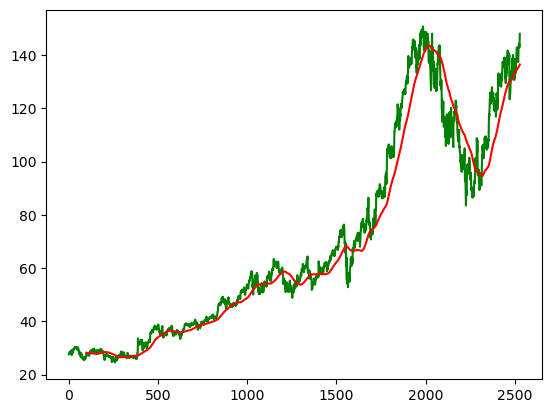

<Figure size 800x600 with 0 Axes>

In [20]:
# Now lets visualize the data to see what we have got 
plt.plot(data.Close,'g') # This is the data for close
plt.plot(Avg_100,'r') # This is the data for the Average close for 100 days
plt.figure(figsize=(8,6)) # This gives size parameters
plt.show()


In [21]:
# Now lets check for 200 days, before we have to take the average.
Avg_200 = data.Close.rolling(200).mean()
print("we got the average close rate of 100 days")


we got the average close rate of 100 days


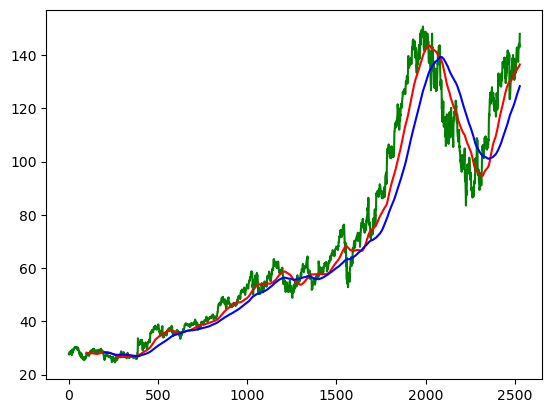

<Figure size 800x600 with 0 Axes>

In [22]:
# Now lets visualize the data to see what we have got 
plt.plot(data.Close,'g') # This is the data for close
plt.plot(Avg_100,'r')# This is the data for the Average close for 100 days
plt.plot(Avg_200,'b')# This is the data for the Average close for 100 days
plt.figure(figsize=(8,6)) # This gives size parameters
plt.show()

In [37]:
train_data = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
test_data = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [40]:
train_data_scale = scaler.fit_transform(train_data)

In [42]:
x = []
y = []

for i in range(100, train_data_scale.shape[0]):
    x.append(train_data_scale[i-100:i])
    y.append(train_data_scale[i,0])
    

In [43]:
x, y = np.array(x), np.array(y)

In [44]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [45]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\TUFF\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [47]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - loss: 0.0603
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0052
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0038
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0062
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0042
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0037
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0033
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0044
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0036
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0048
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0033
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - loss: 0.0037
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - loss: 0.0031
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 0.0030
Epoch 15/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - loss: 0.0

In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [50]:
pas_100_days = train_data.tail(100)# taking the past 100 days

In [53]:
test_data = pd.concat([pas_100_days, test_data], ignore_index=True)

In [55]:
data_test_scale  =  scaler.fit_transform(test_data)

In [56]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [57]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step


In [58]:
scale =1/scaler.scale_

In [59]:
y_predict = y_predict*scale

In [60]:
y = y*scale

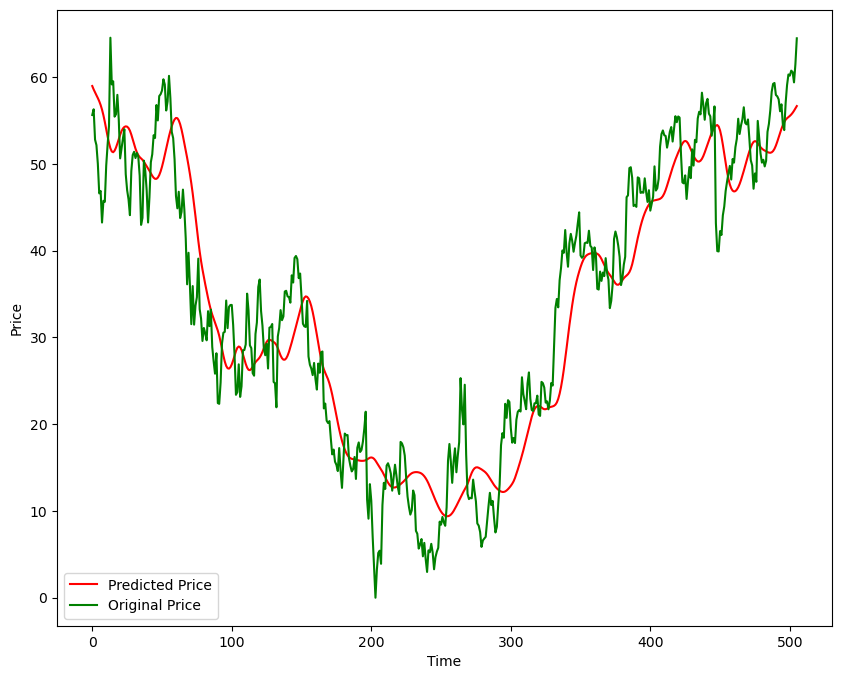

In [61]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [62]:
model.save('Stock Predictions Model.keras')